In [21]:
import pandas as pd
import numpy as np
import os
from io import StringIO
import re
import csv

import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import graphviz

from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import pydotplus

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 400)

os.getcwd()



'/Users/lubagloukhov/Documents/Consulting/PiqueSolutions/JavaSE_202007/scripts'

In [71]:
mod_df = pd.read_csv('../data/output/mod_df.csv')  
catg_dummy_list = open('../data/output/catg_dummy_list.csv').read().splitlines()
cont_dummy_list = open('../data/output/cont_dummy_list.csv').read().splitlines()
dummy0_dummy_list = open('../data/output/dummy0_dummy_list.csv').read().splitlines()
exlc_dummy_list = open('../data/output/exlc_dummy_list.csv').read().splitlines()

In [72]:
# response candidates
[i for i in catg_dummy_list + cont_dummy_list + dummy0_dummy_list if 'Sat' in i] 

['Sat_Org_EclipseIDE',
 'Sat_Org_IntelliJIDE',
 'Sat_Org_JDeveloper',
 'Sat_Org_NetBeansIDE',
 'Sat_Org_RationalAppDev',
 'Sat_Org_VisualStudio',
 'Sat_Org_Other',
 'Sat_Org_JavaSEAMC',
 'Sat_Org_JavaSEAMC_UsageLog',
 'Sat_Org_JavaSEDepRuleSet',
 'Sat_Org_JavaSEMSICustTools',
 'Sat_Org_JavaSEFlightRec',
 'OJavaSESubscription_Elem_Sat_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Sat_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Sat_Org_Monitoring',
 'OJavaSESubscription_Elem_Sat_Org_MyOSupport',
 'OJavaSESubscription_Elem_Sat_Org_AccessCloud',
 'OJavaSESubscription_Elem_Sat_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Sat_Org_LegacyJava',
 'OJavaSESubscription_Elem_Sat_Org_Other',
 'OJavaSESubscription_Attr_Sat_CommMethods',
 'OJavaSESubscription_Attr_Sat_PhoneSupport',
 'OJavaSESubscription_Attr_Sat_SSKnowledge',


In [73]:
predictors = catg_dummy_list + cont_dummy_list + dummy0_dummy_list
response = 'OJavaSESubscription_Elem_Sat_Org_ContinuedInvest'

X = mod_df[predictors].drop(response, axis=1)
y = mod_df[response]

X = X.fillna(X.mean())
y = y.fillna(y.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeRegressor(random_state=0)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

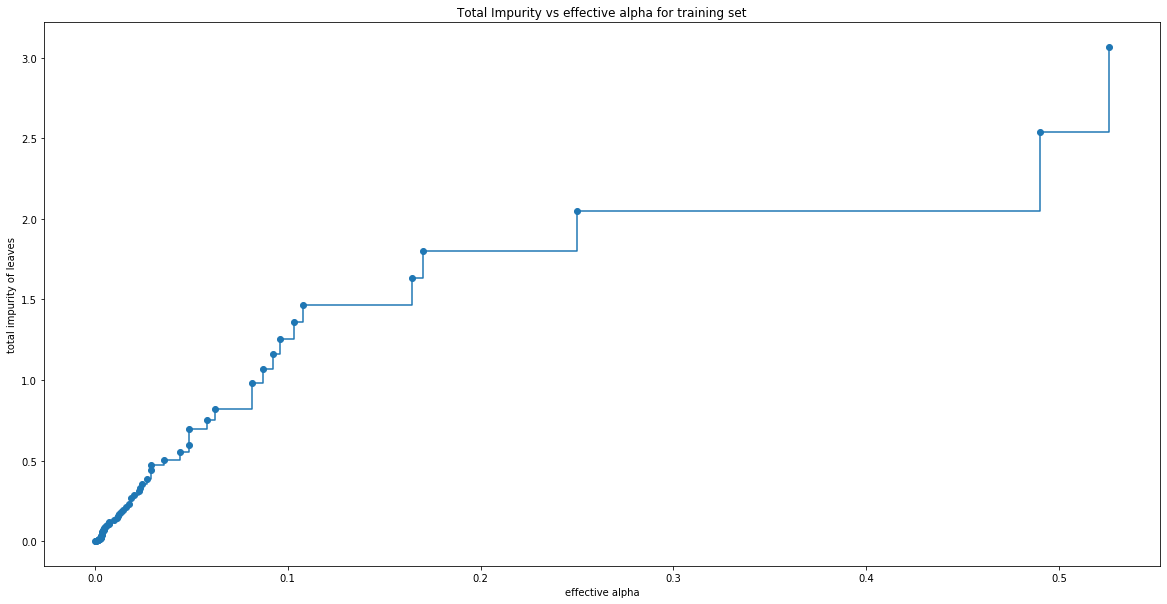

In [78]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [79]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Number of nodes in the last tree is: 1 with ccp_alpha: 1.9724947028815825


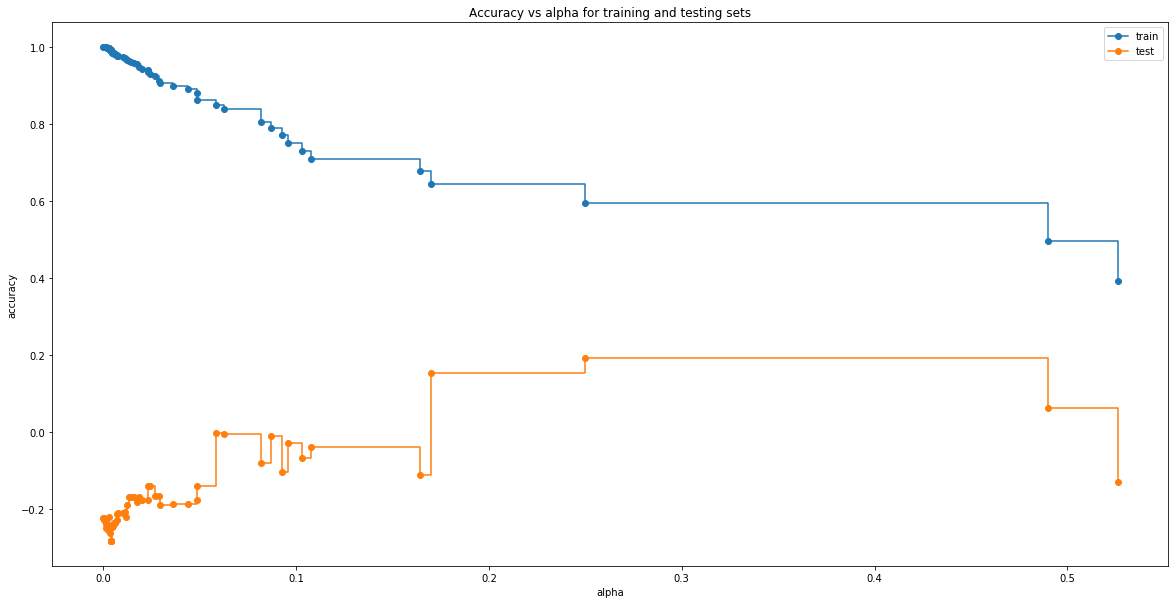

In [81]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

# Fit

In [82]:
clf = DecisionTreeRegressor(random_state=0,ccp_alpha=0.45)

clf.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.45, random_state=0)

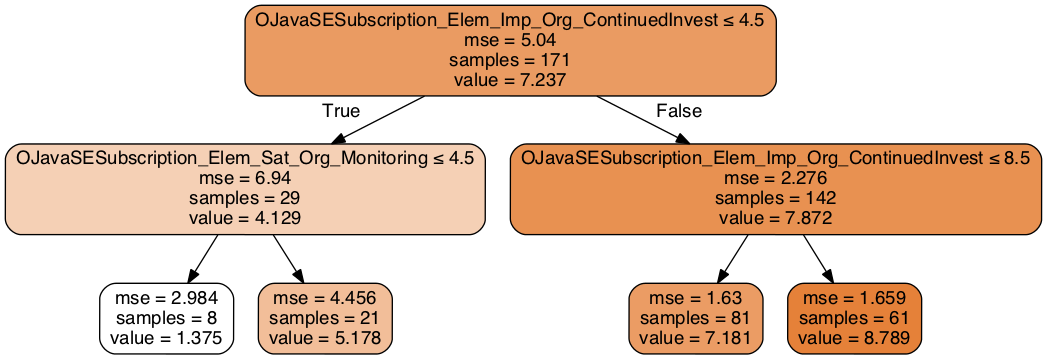

In [83]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [84]:
response

'OJavaSESubscription_Elem_Sat_Org_ContinuedInvest'

# create single Sat variable

In [191]:

y0_list = ['Sat_Org_EclipseIDE',
 'Sat_Org_IntelliJIDE',
 'Sat_Org_JDeveloper',
 'Sat_Org_NetBeansIDE',
 'Sat_Org_RationalAppDev',
 'Sat_Org_VisualStudio',
 'Sat_Org_Other']
y1_list = ['Sat_Org_JavaSEAMC',
 'Sat_Org_JavaSEAMC_UsageLog',
 'Sat_Org_JavaSEDepRuleSet',
 'Sat_Org_JavaSEMSICustTools',
 'Sat_Org_JavaSEFlightRec']
y2_list = ['OJavaSESubscription_Elem_Sat_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Sat_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Sat_Org_Monitoring',
 'OJavaSESubscription_Elem_Sat_Org_MyOSupport',
 'OJavaSESubscription_Elem_Sat_Org_AccessCloud',
 'OJavaSESubscription_Elem_Sat_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Sat_Org_LegacyJava',
 'OJavaSESubscription_Elem_Sat_Org_Other']
y3_list = ['OJavaSESubscription_Attr_Sat_CommMethods',
 'OJavaSESubscription_Attr_Sat_PhoneSupport',
 'OJavaSESubscription_Attr_Sat_SSKnowledge',
 'OJavaSESubscription_Attr_Sat_CoNeedsUnd',
 'OJavaSESubscription_Attr_Sat_TrainingQual',
 'OJavaSESubscription_Attr_Sat_RepsonseTime']

In [192]:
y1_var = mod_df[y1_list].sum(axis=1,skipna=True)
y2_var = mod_df[y2_list].sum(axis=1,skipna=True)
y3_var = mod_df[y3_list].sum(axis=1,skipna=True)

y23_var = mod_df[y2_list+y3_list].sum(axis=1,skipna=True)
y123_var = mod_df[y1_list + y2_list+y3_list].sum(axis=1,skipna=True)
# y23_var = mod_df[y2_list+y3_list].mean(axis=1,skipna=True)

# create single Use/Imp variable

In [203]:
x0_list = ['Use_Org_JavaSEAMC',
 'Use_Org_JavaSEAMC_UsageLog',
 'Use_Org_JavaSEDepRuleSet',
 'Use_Org_JavaSEMSICustTools',
 'Use_Org_JavaSEFlightRec']
x1_list = ['Use_Org_EclipseIDE',
 'Use_Org_IntelliJIDE',
 'Use_Org_JDeveloper',
 'Use_Org_NetBeansIDE',
 'Use_Org_RationalAppDev',
 'Use_Org_VisualStudio',
 'Use_Org_Other']
x2_list = ['OJavaSESubscription_Elem_Imp_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Imp_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Imp_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Imp_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Imp_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Imp_Org_Monitoring',
 'OJavaSESubscription_Elem_Imp_Org_MyOSupport',
 'OJavaSESubscription_Elem_Imp_Org_AccessCloud',
 'OJavaSESubscription_Elem_Imp_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Imp_Org_LegacyJava',
 'OJavaSESubscription_Elem_Imp_Org_Other']
x3_list = ['OJavaSESubscription_Attr_Imp_CommMethods',
 'OJavaSESubscription_Attr_Imp_PhoneSupport',
 'OJavaSESubscription_Attr_Imp_SSKnowledge',
 'OJavaSESubscription_Attr_Imp_CoNeedsUnd',
 'OJavaSESubscription_Attr_Imp_TrainingQual',
 'OJavaSESubscription_Attr_Imp_RepsonseTime']

In [204]:
x0_var = mod_df[x0_list].sum(axis=1)
x1_var = mod_df[x1_list].sum(axis=1)
x2_var = mod_df[x2_list].sum(axis=1)
x3_var = mod_df[x3_list].sum(axis=1)

In [198]:
# determine optimal ccp_alpha
predictors = catg_dummy_list + cont_dummy_list + dummy0_dummy_list
response = y123_var

X = mod_df[predictors].drop(y1_list, axis=1).drop(y2_list, axis=1).drop(y3_list, axis=1)#.drop(x3_list, axis=1)
# X['OJavaSESubscription_Attr_*'] = pd.Series(x3_var, index=X.index)
y = response #mod_df[response]

X = X.fillna(X.mean())
y = y.fillna(y.mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

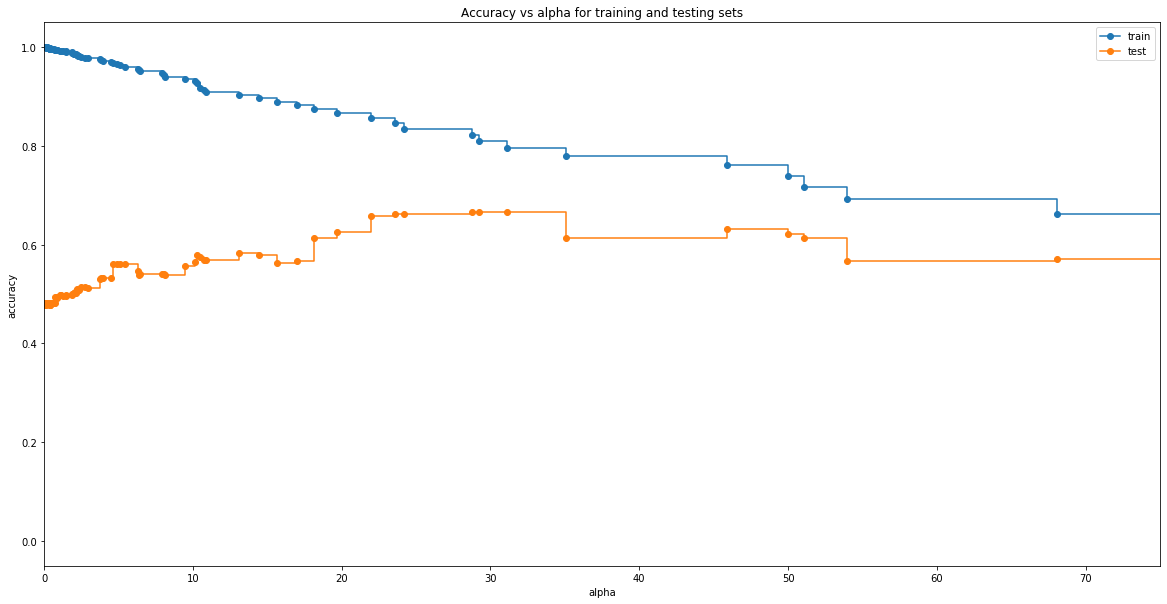

In [194]:
clf = DecisionTreeRegressor(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()

ax.set_xlim([0,75])

ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [195]:
clf = DecisionTreeRegressor(random_state=0,ccp_alpha=33)

clf.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=33, random_state=0)

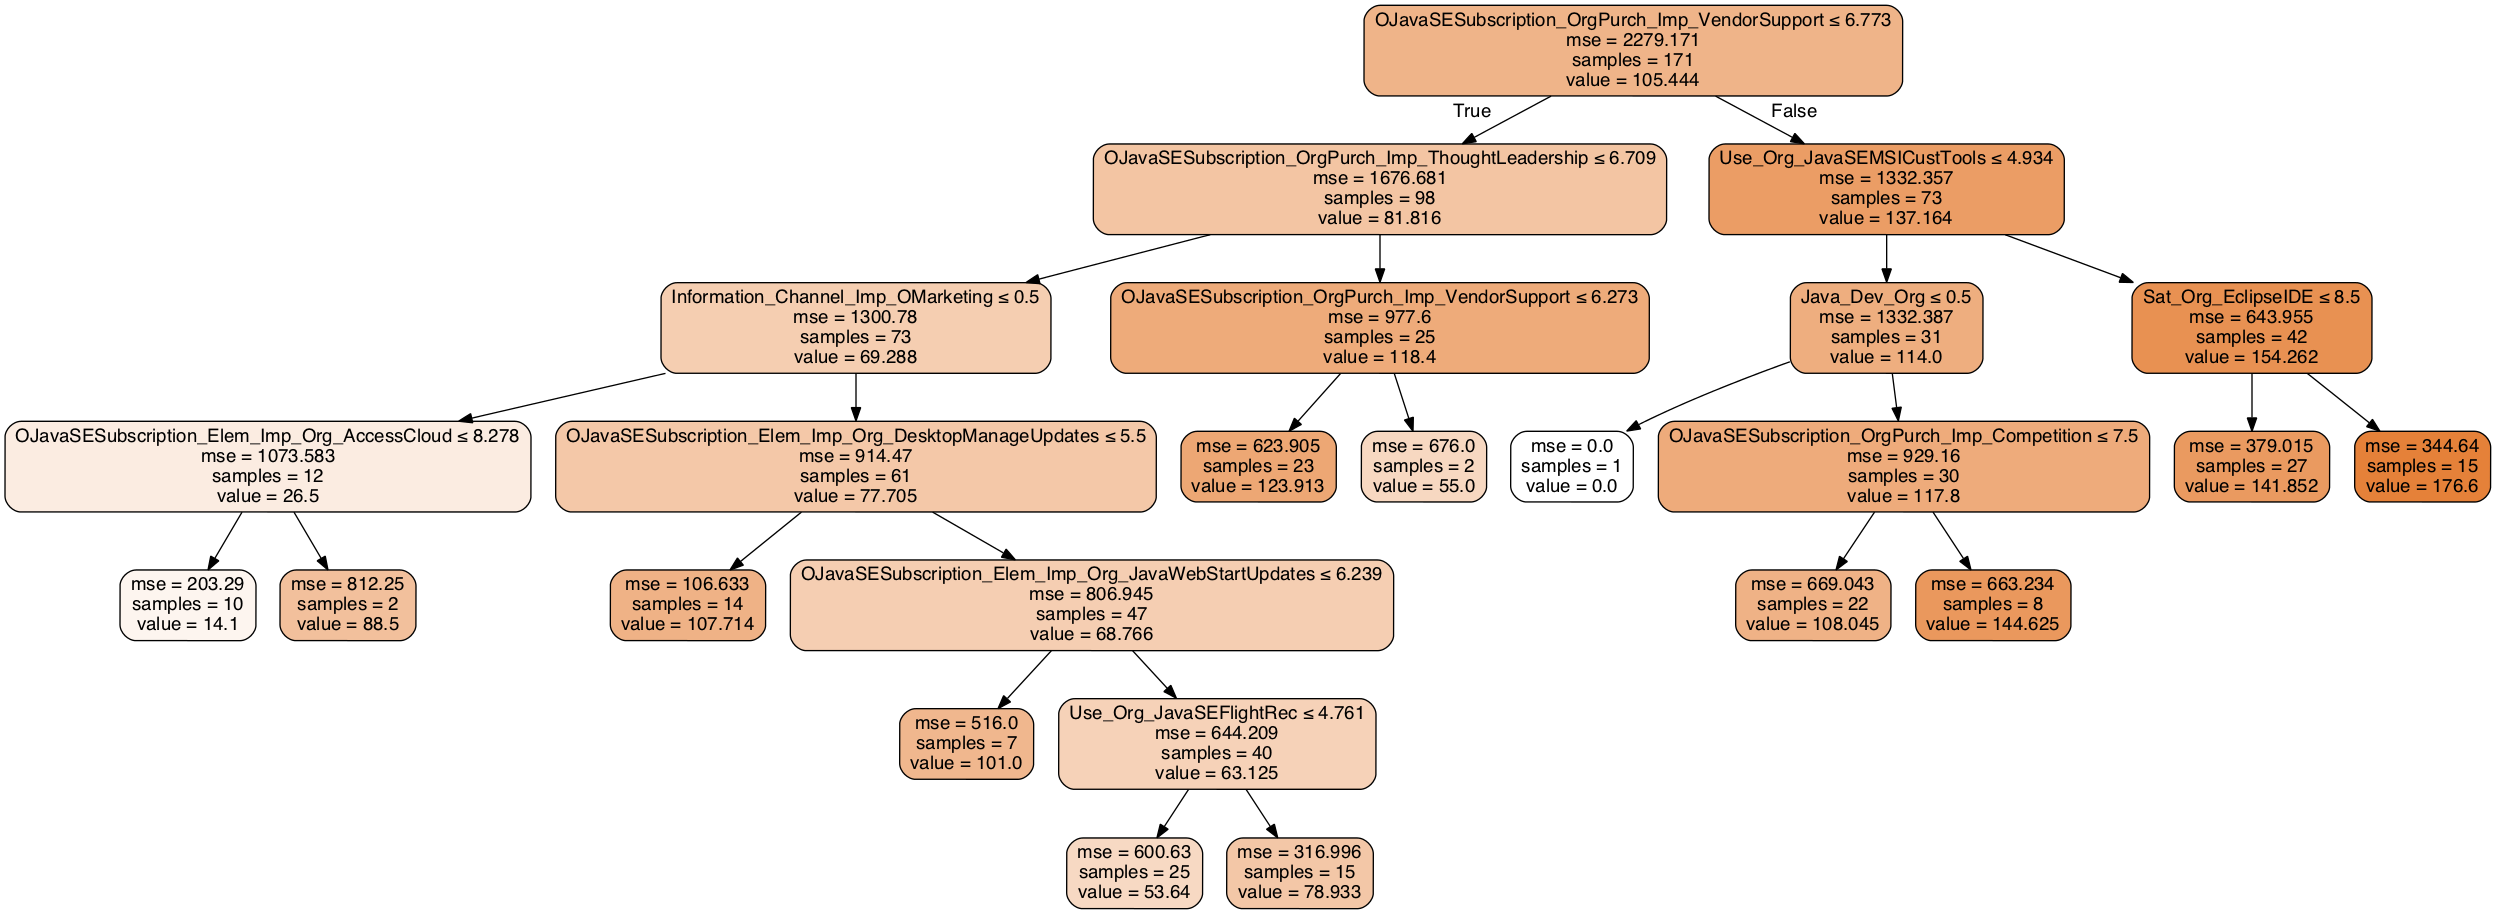

In [196]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [197]:
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.6660664140553711

# Create pipeline for regressing one (or more) vars are a time

In [ ]:
# Required data
mod_df = pd.read_csv('../data/output/mod_df.csv')  
catg_dummy_list = open('../data/output/catg_dummy_list.csv').read().splitlines()
cont_dummy_list = open('../data/output/cont_dummy_list.csv').read().splitlines()
dummy0_dummy_list = open('../data/output/dummy0_dummy_list.csv').read().splitlines()
exlc_dummy_list = open('../data/output/exlc_dummy_list.csv').read().splitlines()


y0_list = ['Sat_Org_EclipseIDE',
 'Sat_Org_IntelliJIDE',
 'Sat_Org_JDeveloper',
 'Sat_Org_NetBeansIDE',
 'Sat_Org_RationalAppDev',
 'Sat_Org_VisualStudio',
 'Sat_Org_Other']
y1_list = ['Sat_Org_JavaSEAMC',
 'Sat_Org_JavaSEAMC_UsageLog',
 'Sat_Org_JavaSEDepRuleSet',
 'Sat_Org_JavaSEMSICustTools',
 'Sat_Org_JavaSEFlightRec']
y2_list = ['OJavaSESubscription_Elem_Sat_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Sat_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Sat_Org_Monitoring',
 'OJavaSESubscription_Elem_Sat_Org_MyOSupport',
 'OJavaSESubscription_Elem_Sat_Org_AccessCloud',
 'OJavaSESubscription_Elem_Sat_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Sat_Org_LegacyJava',
 'OJavaSESubscription_Elem_Sat_Org_Other']
y3_list = ['OJavaSESubscription_Attr_Sat_CommMethods',
 'OJavaSESubscription_Attr_Sat_PhoneSupport',
 'OJavaSESubscription_Attr_Sat_SSKnowledge',
 'OJavaSESubscription_Attr_Sat_CoNeedsUnd',
 'OJavaSESubscription_Attr_Sat_TrainingQual',
 'OJavaSESubscription_Attr_Sat_RepsonseTime']

In [267]:
def dtree_pipe (mod_df = mod_df, 
               catg_dummy_list = catg_dummy_list,
               cont_dummy_list = cont_dummy_list,
               dummy0_dummy_list = dummy0_dummy_list,
               exlc_dummy_list = exlc_dummy_list,
               y_list = y1_list + y2_list + y3_list, # list of response variables, if len()>1, these will be summed or meaned
               X_list = catg_dummy_list + cont_dummy_list + dummy0_dummy_list, 
               y_funct = 'mean', # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
               vis_filename = '../data/output/dtree.png',
               ccpa_filename = '../data/output/ccpa.png'):

    if any(isinstance(el, list) for el in y_list): # flatten list if it's nested
        y_list = [item for sublist in y_list for item in sublist]

    X = mod_df[X_list].drop(y_list, axis=1)
    if y_funct == 'sum':
        y = mod_df[y_list].sum(axis=1,skipna=True)
    elif y_funct == 'mean':
        y = mod_df[y_list].mean(axis=1,skipna=True)
    else:
        y = mod_df[y_list]

    X = X.fillna(X.mean())
    y = y.fillna(y.mean())
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    # find optimal ccp_alpha
    clf = DecisionTreeRegressor(random_state=0)
    path = clf.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
        clf.fit(X_train, y_train)
        clfs.append(clf)

    node_counts = [clf.tree_.node_count for clf in clfs]
    depth = [clf.tree_.max_depth for clf in clfs]

    path = clf.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    train_scores = [clf.score(X_train, y_train) for clf in clfs]
    test_scores = [clf.score(X_test, y_test) for clf in clfs]
    
    fig, ax = plt.subplots()
    ax.set_xlabel("alpha")
    ax.set_ylabel("accuracy")
    ax.set_title("Accuracy vs alpha for training and testing sets")
    ax.plot(ccp_alphas, train_scores, marker='o', label="train",
            drawstyle="steps-post")
    ax.plot(ccp_alphas, test_scores, marker='o', label="test",
            drawstyle="steps-post")
    ax.legend()
    plt.savefig(ccpa_filename)

    ccp_a_df = pd.DataFrame( {'ccp_alphas':ccp_alphas,
                              'train_scores':train_scores,
                              'test_scores':test_scores})
    ccp_a_df['diff'] = ccp_a_df.train_scores - ccp_a_df.test_scores
    ccp_alpha = ccp_a_df['ccp_alphas'].iloc[ccp_a_df['test_scores'].idxmax()]
    
    clf = DecisionTreeRegressor(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    
    dot_data = StringIO()
    export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,
                   feature_names = X_train.columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(vis_filename)
    
    y_pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    
    return(ccp_alpha,clf,score)


                

In [221]:
ccp_alpha, clf, score = dtree_pipe()

<IPython.core.display.Image object>


['OJavaSESubscription_Attr_Sat_RepsonseTime',
 1.084648473131622,
 DecisionTreeRegressor(ccp_alpha=1.084648473131622, random_state=0),
 -0.0007937906059265476]

# Pipe through all individual Y-candidates

In [263]:
y_list_list = y1_list + y2_list + y3_list

In [ ]:
results = []
for y_list in y_list_list:
    print("../data/output/dtree_%s.png" % (y_list))
    
    ccp_alpha, clf, score  = dtree_pipe (
                   mod_df = mod_df, 
                   y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
                   X_list = catg_dummy_list + cont_dummy_list + dummy0_dummy_list, 
                   y_funct = None, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
                   vis_filename = "../data/output/dtree_%s.png" % (y_list),
                   ccpa_filename = "../data/output/ccpa_%s.png" % (y_list))
    
    results.append([y_list, ccp_alpha, clf, score])

ind_y_results = pd.DataFrame(results, columns = ['var', 'ccp_alpha', 'clf', 'score'])
ind_y_results.to_csv('../data/output/ind_y_results.csv',index=False)

../data/output/dtree_Sat_Org_JavaSEAMC.png
../data/output/dtree_Sat_Org_JavaSEAMC_UsageLog.png
../data/output/dtree_Sat_Org_JavaSEDepRuleSet.png
../data/output/dtree_Sat_Org_JavaSEMSICustTools.png
../data/output/dtree_Sat_Org_JavaSEFlightRec.png
../data/output/dtree_OJavaSESubscription_Elem_Sat_Org_ContinuedInvest.png
../data/output/dtree_OJavaSESubscription_Elem_Sat_Org_PatchesOlderV.png
../data/output/dtree_OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates.png
../data/output/dtree_OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates.png
../data/output/dtree_OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools.png
../data/output/dtree_OJavaSESubscription_Elem_Sat_Org_Monitoring.png
../data/output/dtree_OJavaSESubscription_Elem_Sat_Org_MyOSupport.png
../data/output/dtree_OJavaSESubscription_Elem_Sat_Org_AccessCloud.png


# Run through grouped results

In [ ]:
y_list_list = [[y1_list + y2_list + y3_list], 
              [y1_list + y2_list], 
              [y1_list + y3_list], 
              [y2_list + y3_list]
              ]

y_list_names = ['y123', 'y12','y13','y23']

results = []
i=0
for y_list in y_list_list:
    y_funct = 'sum'
    vis_filename = "../data/output/dtree_%s_%s.png" % (y_list_names[i],y_funct)
    ccpa_filename = "../data/output/ccpa_%s_%s.png" % (y_list_names[i],y_funct)
    print(vis_filename)
    
    ccp_alpha, clf, score  = dtree_pipe (
                   mod_df = mod_df, 
                   y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
                   X_list = catg_dummy_list + cont_dummy_list + dummy0_dummy_list, 
                   y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
                   vis_filename =vis_filename,
                   ccpa_filename = ccpa_filename)
    
    results.append([y_list, ccp_alpha, clf, score])
    i = i+1

grp_y_sum_results = pd.DataFrame(results, columns = ['var', 'ccp_alpha', 'clf', 'score'])
grp_y_sum_results.to_csv('../data/output/grp_y_sum_results.csv',index=False)

In [ ]:
y_list_list = [[y1_list + y2_list + y3_list], 
              [y1_list + y2_list], 
              [y1_list + y3_list], 
              [y2_list + y3_list]
              ]

y_list_names = ['y123', 'y12','y13','y23']

results = []
i=0
for y_list in y_list_list:
    y_funct = 'mean'
    vis_filename = "../data/output/dtree_%s_%s.png" % (y_list_names[i],y_funct)
    ccpa_filename = "../data/output/ccpa_%s_%s.png" % (y_list_names[i],y_funct)
    print(vis_filename)
    
    ccp_alpha, clf, score  = dtree_pipe (
                   mod_df = mod_df, 
                   y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
                   X_list = catg_dummy_list + cont_dummy_list + dummy0_dummy_list, 
                   y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
                   vis_filename =vis_filename,
                   ccpa_filename = ccpa_filename)
    
    results.append([y_list, ccp_alpha, clf, score])
    i = i+1

grp_y_sum_results = pd.DataFrame(results, columns = ['var', 'ccp_alpha', 'clf', 'score'])
grp_y_sum_results.to_csv('../data/output/grp_y_mean_results.csv',index=False)

In [253]:
y_list = [y1_list + y2_list + y3_list]
y_list = [item for sublist in y_list for item in sublist]

In [254]:
len(y_list[0])

17

In [255]:
any(isinstance(el, list) for el in y_list)

False

In [249]:
y_list = 'OJavaSESubscription_Attr_Sat_RepsonseTime'
len(y_list)

41

In [239]:
X.drop()

KeyError: "[('Sat_Org_JavaSEAMC', 'Sat_Org_JavaSEAMC_UsageLog', 'Sat_Org_JavaSEDepRuleSet', 'Sat_Org_JavaSEMSICustTools', 'Sat_Org_JavaSEFlightRec', 'OJavaSESubscription_Elem_Sat_Org_ContinuedInvest', 'OJavaSESubscription_Elem_Sat_Org_PatchesOlderV', 'OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates', 'OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates', 'OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools', 'OJavaSESubscription_Elem_Sat_Org_Monitoring', 'OJavaSESubscription_Elem_Sat_Org_MyOSupport', 'OJavaSESubscription_Elem_Sat_Org_AccessCloud', 'OJavaSESubscription_Elem_Sat_Org_FlexLicensing', 'OJavaSESubscription_Elem_Sat_Org_LegacyJava', 'OJavaSESubscription_Elem_Sat_Org_Other', 'OJavaSESubscription_Attr_Sat_CommMethods', 'OJavaSESubscription_Attr_Sat_PhoneSupport', 'OJavaSESubscription_Attr_Sat_SSKnowledge', 'OJavaSESubscription_Attr_Sat_CoNeedsUnd', 'OJavaSESubscription_Attr_Sat_TrainingQual', 'OJavaSESubscription_Attr_Sat_RepsonseTime')] not found in axis"